### Part 1: Generate Table of Riboswitch Data

#### Access Sequences- Copying them manually from the paper figures, 5' to 3'
Figure 2A: Yes-1:  
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC   

Figure 4A: Not-1:  
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC  

Figure 5A: And- 1:  
GGGCGAACCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAGGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGGCCAGAGACAAU  

Figure 6A: Or- 1:  
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCGCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC

#### Generate Summary table using sqlite package in jupyter notebook
Note: -1 means that value doesn't exist for that sequence


In [30]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('my.db')
c = conn.cursor()
c.execute("""DROP TABLE riboswitch""")
c.execute("""CREATE TABLE riboswitch (id INTEGER PRIMARY KEY, name TEXT, startObs1 INT, endObs1 INT, startObs2 INT, endObs2 INT, startRed1 INT, endRed1 INT, startRed2 INT, endRed2 INT);""")
cmd = """INSERT INTO riboswitch (name, startObs1, endObs1, startObs2, endObs2, startRed1, endRed1, startRed2, endRed2) VALUES(?,?,?,?,?,?,?,?,?)"""
names = ["YES-1", "NOT-1", "AND-1", "OR-1"]
startObs1= [26, 44, 30, 27]
endObs1= [47, 66, 45, 46]
startObs2= [-1, -1, 49, 47]
endObs2 =[-1, -1, 64, 66]
startRed1 = [16, 40, 16, 16]
endRed1 = [21, 44, 23, 26]
startRed2 = [49, 74, 70, 67]
endRed2 =[54, 77, 77, 77]

i = 0
while i < len(names) :
    temp_value = (names[i], startObs1[i], endObs1[i], startObs2[i], endObs2[i], startRed1[i], endRed1[i], startRed2[i], endRed2[i])
    c.execute(cmd, temp_value)
    i += 1
    conn.commit()
df2 = pd.read_sql_query("select * from riboswitch;", conn)
df2

,id,name,startObs1,endObs1,startObs2,endObs2,startRed1,endRed1,startRed2,endRed2
0,1,YES-1,26,47,-1,-1,16,21,49,54
1,2,NOT-1,44,66,-1,-1,40,44,74,77
2,3,AND-1,30,45,49,64,16,23,70,77
3,4,OR-1,27,46,47,66,16,26,67,77


In [31]:
#Confirm sequence lengths match those in the paper
Yes1 = "GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"
print(len(Yes1))
Not1 = "GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC"
print(len(Not1))
And1 = "GGGCGAACCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAGGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGGCCAGAGACAAU"
print(len(And1))
Or1 = "GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCGCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"
print(len(Or1))

80
92
112
103


### Part 2: Run subprocess command to generate initial RNAfold plots

#### Required that I download wand package and ghostscript locally to get pdfs to output inline 

In [32]:
import subprocess
seqs = """>seq1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>seq2
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
>seq3
GGGCGAACCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAGGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGGCCAGAGACAAU
>seq4
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCGCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>@"""
p = subprocess.run(['RNAfold'], input = bytes(seqs, 'ascii'), stdout=subprocess.PIPE, stderr= subprocess.PIPE)

print(p.stdout.decode())

>seq1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)
>seq2
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)
>seq3
GGGCGAACCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAGGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGGCCAGAGACAAU
.(((.(((((((((((((((...(((.....(((.((((.....)))).))).....)))..))))))).))).......(((((....)))))))))).)))......... (-39.60)
>seq4
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).)))))))) (-40.00)



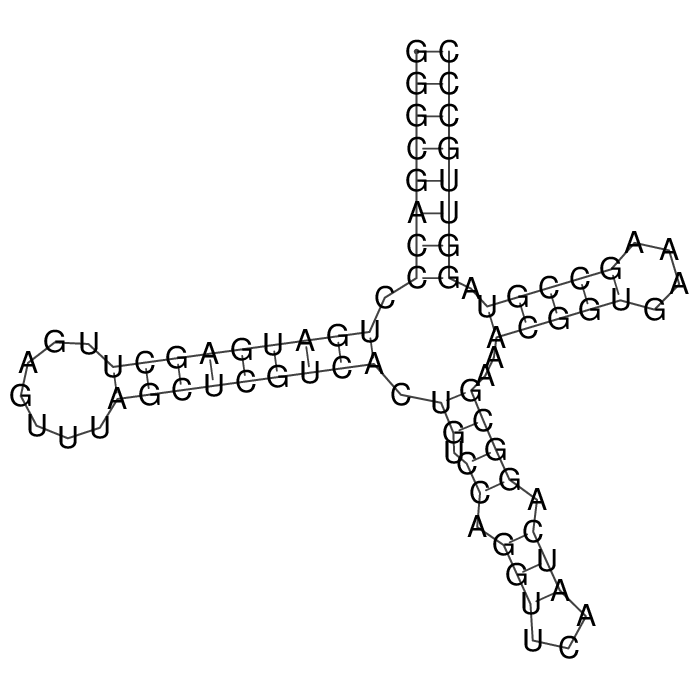

In [19]:
from IPython.display import Image, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img1 = WImage(filename = "seq1_ss.pdf")
img1

### Compare figure 1 (YES-1) to that in the article   

The upper right loop and aligned stem match those in the article, but the article has the two lower loops merged into one continuous loop.

The above image seems to be the stem-II version; the paper decribes that they limited the folding to the stem-IV construct by limiting the presence of a DNA-effector that favors the above folded shape. The major difference has to do with whether or not the OBS-1 region is allowed to fold on itself. The above does have some folding on the OBS-1 region, whereas the paper limits all folding to keep the OBS-1 region linear so that the OBS can bind there.


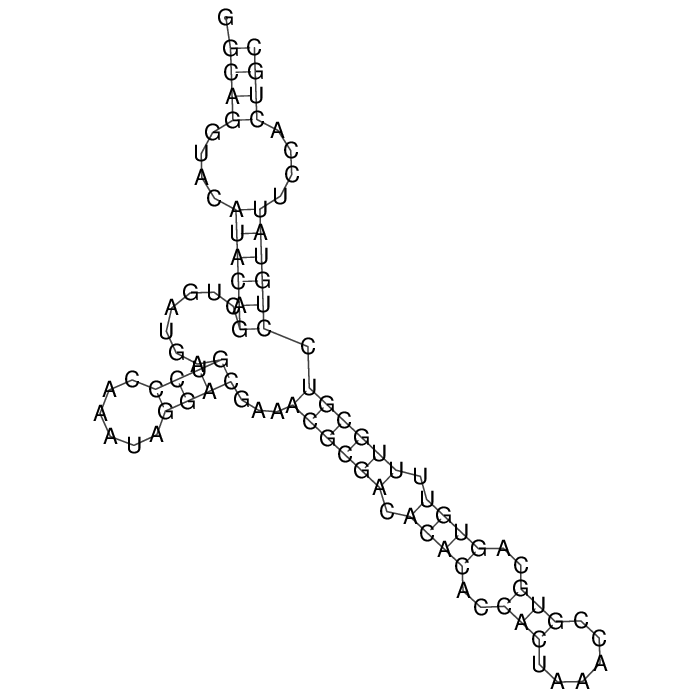

In [20]:
from IPython.display import Image, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img2 = WImage(filename = "seq2_ss.pdf")
img2

### Compare figure 2 (NOT-1) to that in the article   

Overall, figure 2 seems to match the article figure exactly; this matches the native ON state (red regions are bound to each other)

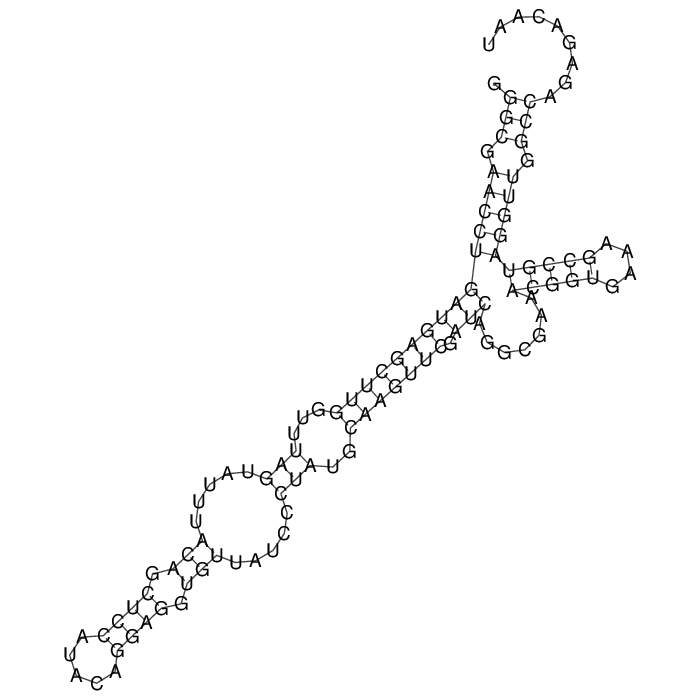

In [22]:
from IPython.display import Image, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img3 = WImage(filename = "seq3_ss.pdf")
img3

### Compare figure 3 (AND-1) to that in the article   

Figure 3 seems to match the article perfectly; this matches the native OFF state, where the red regions are not bound to each other.

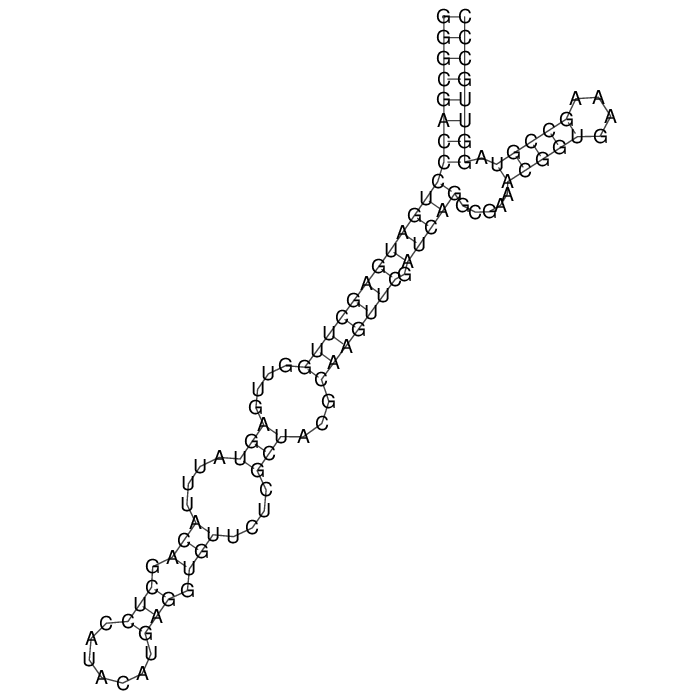

In [23]:
from IPython.display import Image, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img4 = WImage(filename = "seq4_ss.pdf")
img4

### Compare figure 4 (OR-1) to that in the article   

Figure-4 seems to almost exactly match the article figure; the above configuration is has a slight variation from the native OFF state where only 1 bp in the red regions pair (a G-U pseudo-pair). Because the above figure favored a pair between the A adjacent to the G instead (AU instead of GU), there is a slight difference where the G is left unbonded instead.

## Part 3 (The meat of the lab): Add constraints and run RNAfold again

### 1) Write a function to generate constraint strings based on start and end points of OBS sequences as demonstrated in the above tables. Use vim to write to .txt constraint files.

### 2) Use subprocess to run RNAfold again, this time using constraints

### 3) Use WImage locally to generate new inline plots

### 4) Compare to figure plots

In [5]:
##generate constraint string for Yes_1

start = 26
end = 47
length = 80

def constraint_gen(start, end, length):
    constraint = ""
    i = 1
    while i <= length :
        if (i<= end and i>= start) :
            constraint += "x"
        else :
            constraint +="."
        i +=1
    return constraint

Yes_1_constraint = constraint_gen(26, 47, 80)
print(len(Yes_1_constraint))
print(Yes_1_constraint)
Not_1_constraint= constraint_gen(44,66,92)
print(len(Not_1_constraint))
print(Not_1_constraint)

80
.........................xxxxxxxxxxxxxxxxxxxxxx.................................
92
...........................................xxxxxxxxxxxxxxxxxxxxxxx..........................


In [7]:
import subprocess
p2 = subprocess.run(['RNAfold', '-C', 'YES-1_constraints.txt'], stdout=subprocess.PIPE, stderr= subprocess.PIPE)
print(p2.stdout.decode())
p3 = subprocess.run(['RNAfold', '-C', 'NOT-1_constraints.txt'], stdout=subprocess.PIPE, stderr= subprocess.PIPE)
print(p3.stdout.decode())

>seq5
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((...........................))))))...(((((....))))).)))))))) (-24.50)

>seq6
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((..((((.((((......))))(((((((.......................))))))).))))))))))....)))) (-20.80)



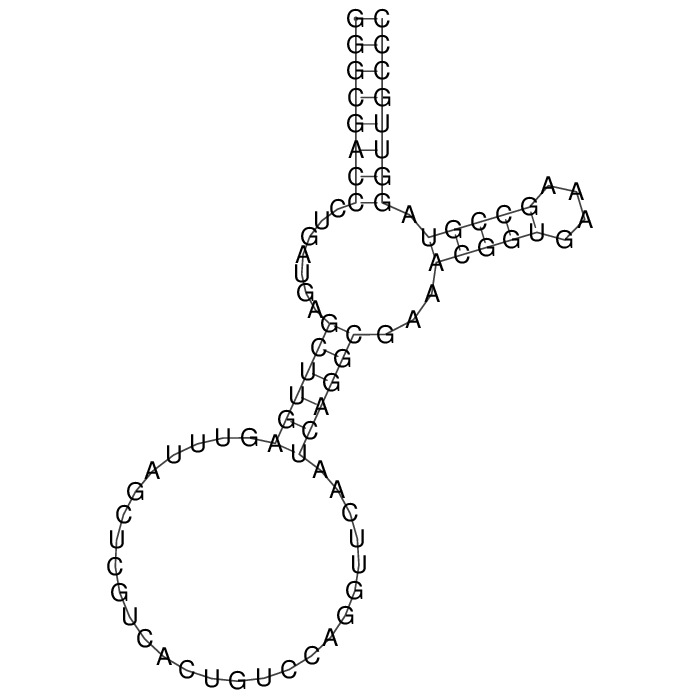

In [1]:
from IPython.display import Image, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img5 = WImage(filename = "seq5_ss.pdf")
img5

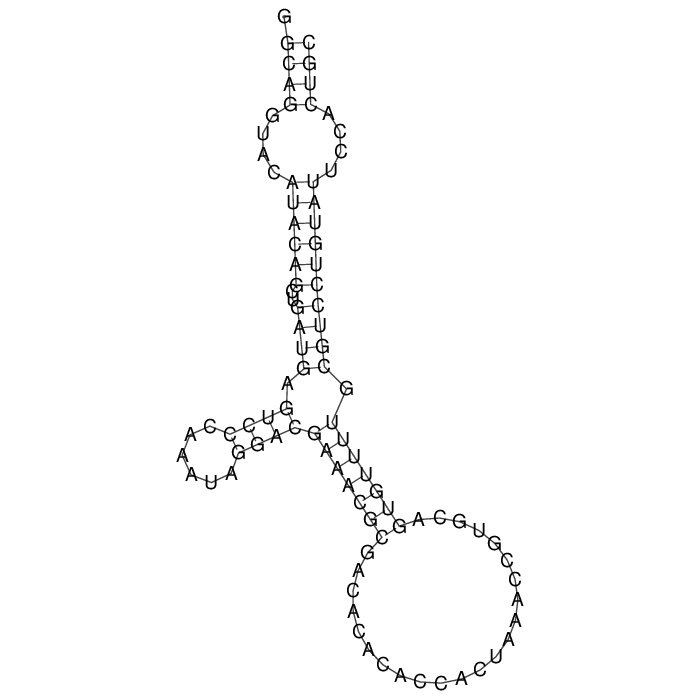

In [2]:
from IPython.display import Image, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img6 = WImage(filename = "seq6_ss.pdf")
img6

## Part 3b: Add constraints and run RNAfold again- but for AND/OR cases

### 1) Write a function to generate constraint strings based on start and end points of OBS1 and OBS2 sequences as demonstrated in the above tables. Reuse constraint_gen function from above to generate single constraint region constraint.txt files. Use vim to write to .txt constraint files.

### 2) Use subprocess to run RNAfold again, this time using constraints

### 3) Use WImage locally to generate new inline plots

### 4) Compare to figure plots

### 5) generate T/F table

In [1]:
def constraint_gen(start, end, length):
    constraint = ""
    i = 1
    while i <= length :
        if (i<= end and i>= start) :
            constraint += "x"
        else :
            constraint +="."
        i +=1
    return constraint

def double_constraint(start1, end1, start2, end2, length) :
    constraint = ""
    i = 1
    while i <= length :
        if (i<= end1 and i>= start1):
            constraint += "x"
        elif i<= end2 and i>= start2:
            constraint +="x"
            
        else:
            constraint +="."
        i +=1
    return constraint

And_1_constraint1 = constraint_gen(30,45,112)
print(len(And_1_constraint1))
print(And_1_constraint1)
And_1_constraint2 = constraint_gen(49,64,112)
print(len(And_1_constraint2))
print(And_1_constraint2)
And_1_constraint_both = double_constraint(30,45,49,64,112)
print(len(And_1_constraint_both))
print(And_1_constraint_both)

Or_1_constraint1= constraint_gen(27,46, 103)
print(len(Or_1_constraint1))
print(Or_1_constraint1)
Or_1_constraint2 = constraint_gen(47,66, 103)
print(len(Or_1_constraint2))
print(Or_1_constraint2)
Or_1_constraint_both = double_constraint(27,46,47,66,103)
print(len(Or_1_constraint_both))
print(Or_1_constraint_both)

112
.............................xxxxxxxxxxxxxxxx...................................................................
112
................................................xxxxxxxxxxxxxxxx................................................
112
.............................xxxxxxxxxxxxxxxx...xxxxxxxxxxxxxxxx................................................
103
..........................xxxxxxxxxxxxxxxxxxxx.........................................................
103
..............................................xxxxxxxxxxxxxxxxxxxx.....................................
103
..........................xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx.....................................


In [8]:
p4 = subprocess.run(['RNAfold', '-C', 'AND-1_constraints.txt'], stdout=subprocess.PIPE, stderr= subprocess.PIPE)
print(p4.stdout.decode())
p5 = subprocess.run(['RNAfold', '-C', 'OR-1_constraints.txt'], stdout=subprocess.PIPE, stderr= subprocess.PIPE)
print(p5.stdout.decode())

>seq7
GGGCGAACCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAGGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGGCCAGAGACAAU
.(((.(((((((((((((((..........................(((.(....))))...))))))).))).......(((((....)))))))))).)))......... (-27.10)
>seq8
GGGCGAACCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAGGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGGCCAGAGACAAU
.(((.(((((.....((((((((..((....))..((((.....)))).....................))))))))...(((((....)))))))))).)))......... (-28.60)
>seq9
GGGCGAACCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAGGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGGCCAGAGACAAU
.(((.(((((.....((((((((..............................................))))))))...(((((....)))))))))).)))......... (-23.64)

>seq10
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCGCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((((((...........................))))..)).))))))).))))).....(((((....))))).)))))))) (-34.80)
>seq11
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAU

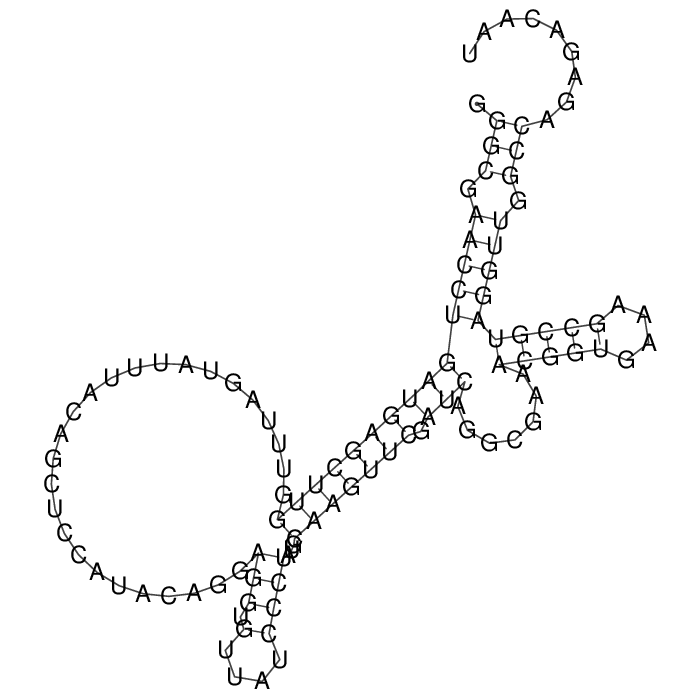

In [2]:
from IPython.display import Image, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img7 = WImage(filename = "seq7_ss.pdf")
img7

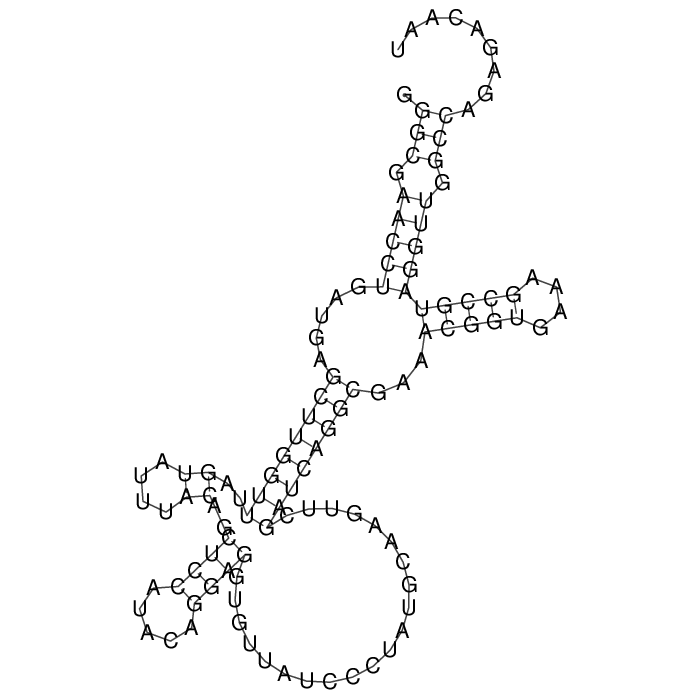

In [4]:
from IPython.display import Image, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img8= WImage(filename = "seq8_ss.pdf")
img8

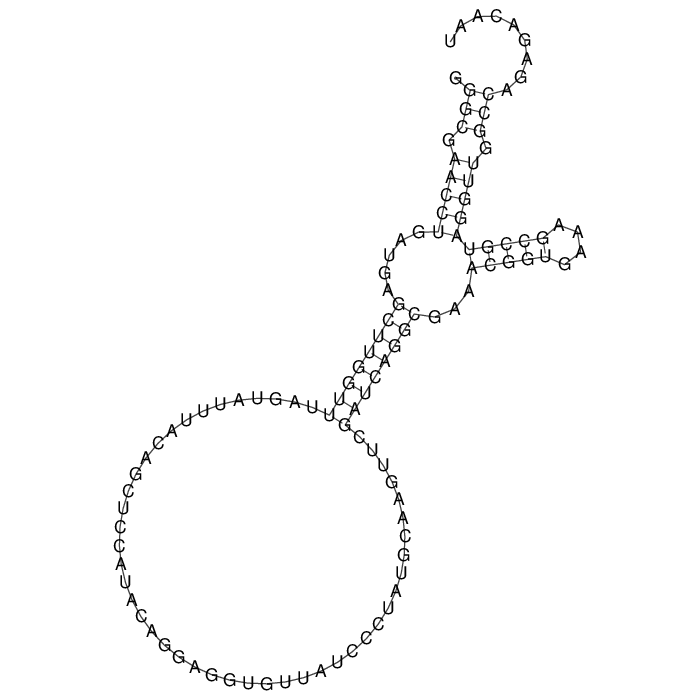

In [5]:
from IPython.display import Image, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img9 = WImage(filename = "seq9_ss.pdf")
img9

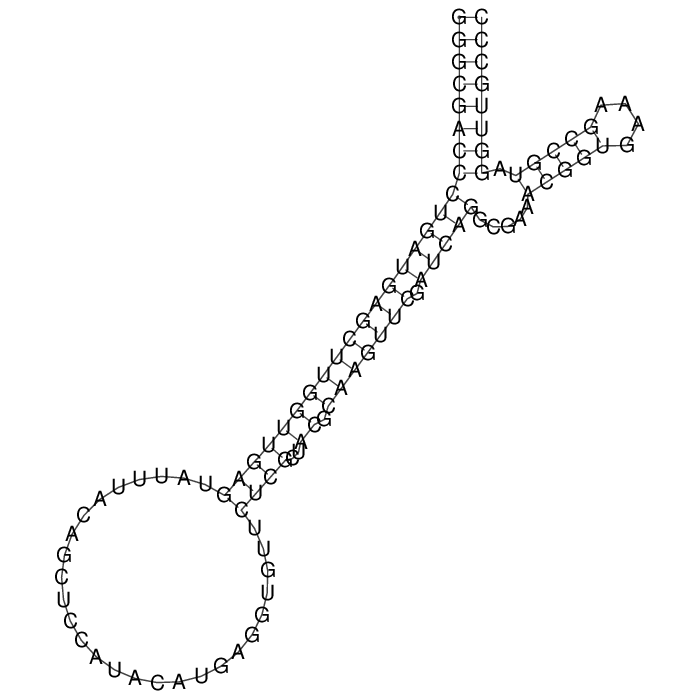

In [6]:
from IPython.display import Image, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img10 = WImage(filename = "seq10_ss.pdf")
img10

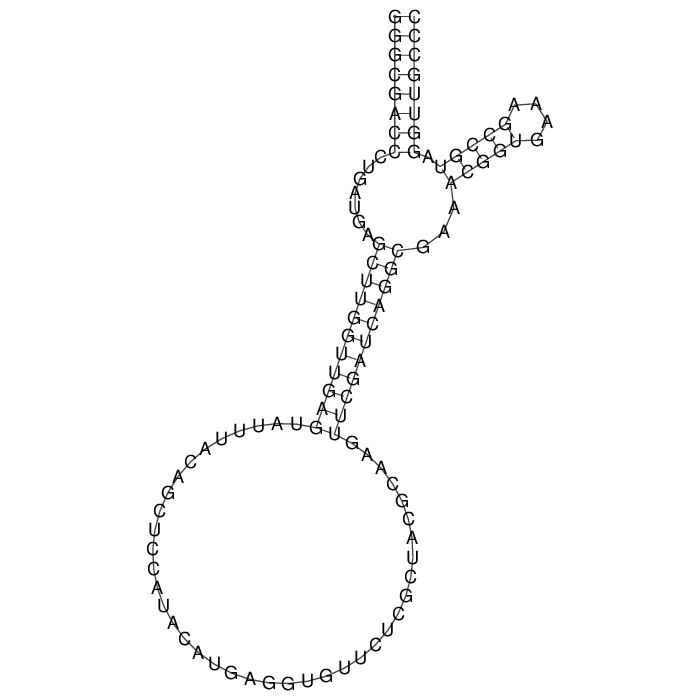

In [7]:
from IPython.display import Image, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img11 = WImage(filename = "seq11_ss.pdf")
img11

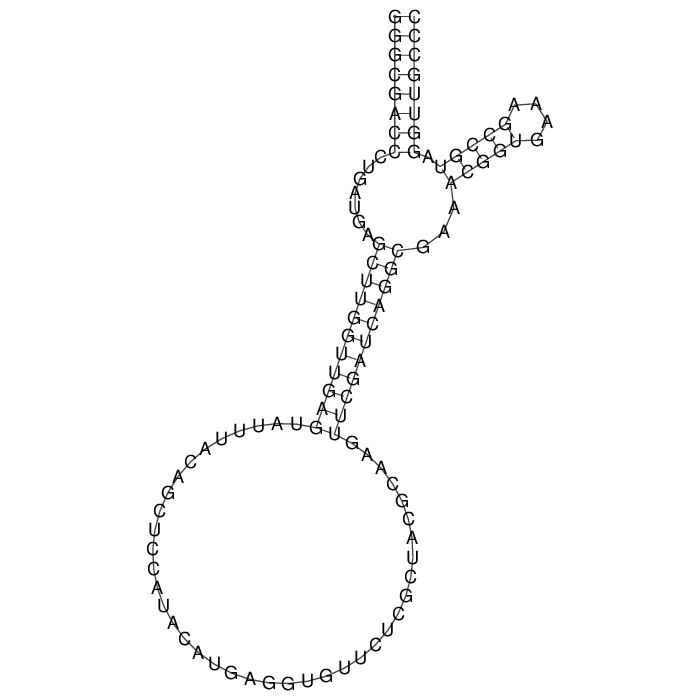

In [8]:
from IPython.display import Image, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img12 = WImage(filename = "seq12_ss.pdf")
img12